In [92]:
import numpy as np
from statistics import *
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind_from_stats
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import binomtest

## Exercício 01



*   Queremos testar a média
*   σ desconhecido
*   Amostra pequena ($n < 30$)






\begin{cases}
    H_{0}: μ \geq 168 \\
    H_{1}: μ < 168
\end{cases}

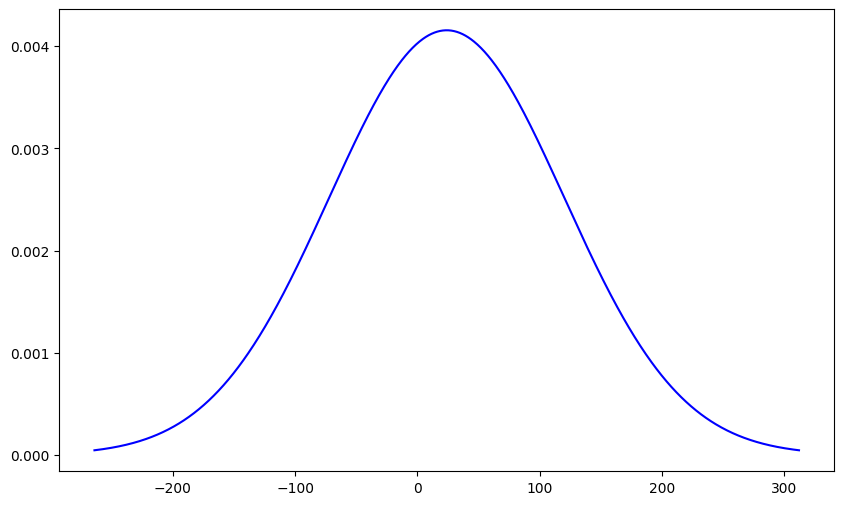

In [106]:
plt.figure(figsize=(10,6))

# array de 1000 valores entre 135 e 201 para formar uma 'linha'
x = np.linspace(24 - 3*96,24 + 3*96,1000)
pdf = norm.pdf(x,24,96)
plt.plot(x,pdf, color = "blue")
plt.show()

In [109]:
#x = np.array([174.8, 170.5, 172.0, 170.9, 178.1, 179.0, 184.5, 143.0, 171.2, 172.6, 140.4, 165.2])

xb = 20
mu0 = 24
s = np.sqrt(96)
n = 20

z = (xb - mu0) / (s / np.sqrt(n))

print(f"Valor da estatística do teste: {z}")

# t students com n-1 graus de liberdade
alpha_hat = t.cdf(z, n-1)

print(f"Valor-p: {alpha_hat}")



Valor da estatística do teste: -1.8257418583505538
Valor-p: 0.04182438471110662


Não rejeita $H_{0}$.

In [95]:
ttest_1samp(x,168,alternative = "less")

Ttest_1sampResult(statistic=0.13290174269719104, pvalue=0.5516644283867019)

## Exercício 02



*   Queremos testar a proporção

\begin{cases}
    H_{0}: p \geq 0,04 \\
    H_{1}: p < 0,04
\end{cases}

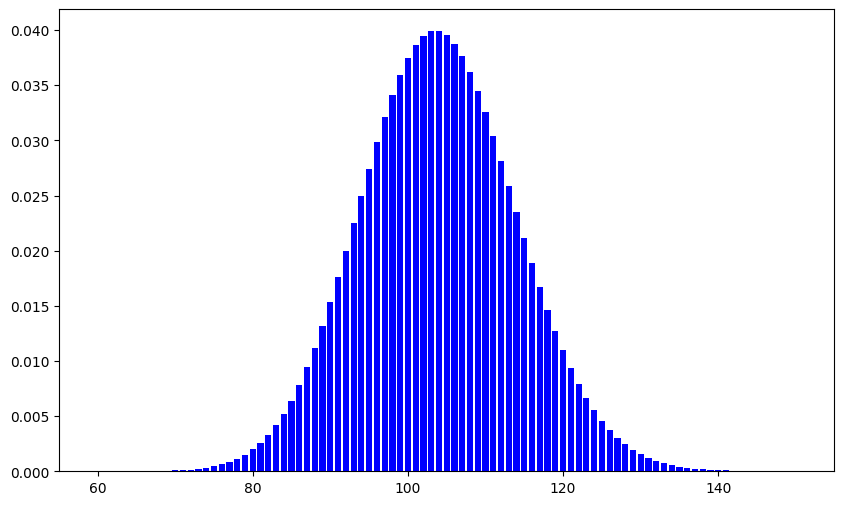

In [96]:
plt.figure(figsize=(10,6))

x = np.linspace(60,150,91)
pdf = binom.pmf(x,2600,0.04)
plt.bar(x,pdf, color = "blue")
plt.show()

In [97]:
n = 2200
# Queremos estimar a proporcao p de domicilios fora da faixa recomendada
# 2482 domicilios na faixa recomendada
sucessos = n - 2055
print(sucessos)

p0 = 0.06

# proporcao p de domicilios fora da faixa recomendada = sucessos / n
print(f"Valor da estatística do teste: {sucessos / n}")

# Como a significancia é maior que 10% (92%), então o sucesso é garantido
alpha_hat = binom.cdf(sucessos,n,p0)

print(f"Valor-p: {alpha_hat}")

145
Valor da estatística do teste: 0.0659090909090909
Valor-p: 0.8861552383265511


In [98]:
n = 1500
# Queremos estimar a proporcao p de domicilios fora da faixa recomendada
# 2482 domicilios na faixa recomendada
sucessos = n - 1360
print(sucessos)

p0 = 0.07

# proporcao p de domicilios fora da faixa recomendada = sucessos / n
print(f"Valor da estatística do teste: {sucessos / n}")

# Como a significancia é maior que 10% (92%), então o sucesso é garantido
alpha_hat = binom.cdf(sucessos,n,p0)

print(f"Valor-p: {alpha_hat}")

140
Valor da estatística do teste: 0.09333333333333334
Valor-p: 0.999711006015361


Não rejeita $H_{0}$.

In [99]:
binomtest(sucessos, n, p0, alternative = "greater")

BinomTestResult(k=140, n=1500, alternative='greater', proportion_estimate=0.09333333333333334, pvalue=0.00040525793412532387)

## Exercício 03


*   Queremos testar a se as médias são iguais
*   $σ_1$ e $σ_2$ conhecidos, mas diferentes 
*   Amostra grande 

\begin{cases}
    H_{0}: \mu_1 = \mu_2 \\
    H_{1}: \mu_1 \neq \mu_2
\end{cases}

In [100]:
xb1 = 65
n1 = 64
s12 = 8**2

xb2 = 62
n2 = 49
s22 = 6**2

z = (xb1 - xb2) / np.sqrt((s12 / n1) + (s22 / n2))

print(f"Valor da estatística do teste: {z}")
 
# como valor-p é maior que 1% (também poderia ser 97.5%), então H0 não é rejeitado
#alpha_hat = norm.cdf((-1) * np.abs(z),0,1)

# Como o valor deu mais que 2%, então H0 não é rejeitado
alpha_hat = 2 * norm.cdf((-1) * np.abs(z),0,1)

# também poderia ser:  alpha_hat = 2 * norm.cdf((-1) * np.abs(z),0,1), mas ai o valor-p teria que ser menor que 5%

print(f"Valor-p: {alpha_hat}")

Valor da estatística do teste: 2.27776980709589
Valor-p: 0.022740296115299704


Rejeita $H_0$.

Não encontrei função para essa.

## Exercício 04


*   Queremos testar a se as médias são iguais
*   $σ_1$ e $σ_2$ conhecidos, mas diferentes 
*   Amostra grande 

\begin{cases}
    H_{0}: \mu_1 = \mu_2 \\
    H_{1}: \mu_1 \neq \mu_2
\end{cases}

In [101]:
xb1 = 24.2
n1 = 13
s12 = (3.5)**2

xb2 = 25.2
n2 = 16
s22 = (4.44)**2

# temos as variancias das amostras, mas nao da populacao, portanto usaremos a equacao do slide
z = (xb1 - xb2) / np.sqrt((s12 / n1) + (s22 / n2))

print(f"Valor da estatística do teste: {z}")

# Como usamos T-student, de acordo com o slide, usaremos v graus de liberdade
# nesse caso, v é calculado com a fórmula
v = ( (((s12 / n1) + (s22 / n2))**2) / ( (((s12 / n1)**2) / (n1 + 1)) + (((s22 / n2)**2) / (n2 + 1)) ) ) - 2
 
# Como alpha_hat deu menos que 10%, então a hipotese foi rejeitada
alpha_hat = 2 * t.cdf((-1) * np.abs(z),v)

print(f"Valor-p: {alpha_hat}")

Valor da estatística do teste: -0.6781558494315301
Valor-p: 0.5030562499023957


Rejeita $H_0$.

In [102]:
ttest_ind_from_stats(xb1,np.sqrt(s12),n1,xb2,np.sqrt(s22),n2, equal_var = False)

Ttest_indResult(statistic=-0.6781558494315301, pvalue=0.5034467673125831)

## Exercício 05

*   Queremos testar a se as médias são iguais 
*   Amostra grande 

\begin{cases}
    H_{0}: p_1 = p_2 \\
    H_{1}: p_1 < p_2
\end{cases}

In [103]:
# Estamos verificando se a proporção é igual entre os motoristas
# Usando a formula do slide de que H0: p1 = p2 
n1 = 2920
pb1 = 1320 / n1

n2 = 2360
pb2 = 905 / n2

pb = (n1*pb1 + n2*pb2) / (n1 + n2)

z = (pb1 - pb2) / np.sqrt(pb * (1 - pb) * (1/n1 + 1/n2))

print(f"Valor da estatística do teste: {z}")

# So precisamos multiplicar a normal por 2 caso H1 seja diferente, como H1 é menor que, então não precisa
alpha_hat = norm.cdf((-1) * np.abs(z),0,1)

# Como o valor-p deu menos que 0.05, entao H0 foi rejeitado?
print(f"Valor-p: {alpha_hat}")

Valor da estatística do teste: 5.017560715392431
Valor-p: 2.6165832908529977e-07


Rejeita $H_{0}$.